In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Hires.csv")
data

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N
5,0,N,0,PhD,Y,Y,Y
6,5,Y,2,MS,N,Y,Y
7,3,N,1,BS,N,Y,Y
8,15,Y,5,BS,N,N,Y
9,0,N,0,BS,N,N,N


In [3]:
data.isnull().sum()

Years Experience      0
Employed?             0
Previous employers    0
Level of Education    0
Top-tier school       0
Interned              0
Hired                 0
dtype: int64

In [4]:
data["Employed?"].unique()

array(['Y', 'N'], dtype=object)

In [5]:
data["Level of Education"].unique()

array(['BS', 'MS', 'PhD'], dtype=object)

In [6]:
data["Top-tier school"].unique()

array(['N', 'Y'], dtype=object)

In [7]:
data["Interned"].unique()

array(['N', 'Y'], dtype=object)

In [8]:
data["Hired"].unique()

array(['Y', 'N'], dtype=object)

In [9]:
data0=data.copy()

In [10]:
YN={'Y': 1, 'N':0}

data0['Employed?']=data0['Employed?'].map(YN)
data0['Top-tier school']=data0['Top-tier school'].map(YN)
data0['Interned']=data0['Interned'].map(YN)
data0['Hired']=data0['Hired'].map(YN)
data0['Level of Education']=data0['Level of Education'].map({'BS':1,'MS':2,'PhD':3})

data0

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,1,0,0,1
1,0,0,0,1,1,1,1
2,7,0,6,1,0,0,0
3,2,1,1,2,1,0,1
4,20,0,2,3,1,0,0
5,0,0,0,3,1,1,1
6,5,1,2,2,0,1,1
7,3,0,1,1,0,1,1
8,15,1,5,1,0,0,1
9,0,0,0,1,0,0,0


In [11]:
data0.isnull().sum()

Years Experience      0
Employed?             0
Previous employers    0
Level of Education    0
Top-tier school       0
Interned              0
Hired                 0
dtype: int64

In [12]:
feature=list(data0.columns[:6])

In [13]:
data0.isnull().sum()

Years Experience      0
Employed?             0
Previous employers    0
Level of Education    0
Top-tier school       0
Interned              0
Hired                 0
dtype: int64

In [14]:
print(data0.columns.values)
print(len(data0.columns.values))

['Years Experience' 'Employed?' 'Previous employers' 'Level of Education'
 'Top-tier school' 'Interned' 'Hired']
7


In [15]:
feature=list(data0.columns[:6])
feature

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

In [16]:
from sklearn import tree

In [17]:
x=data0[feature]
y=data0["Hired"]

In [18]:
clf01=tree.DecisionTreeClassifier()

In [19]:
DT=clf01.fit(x,y)

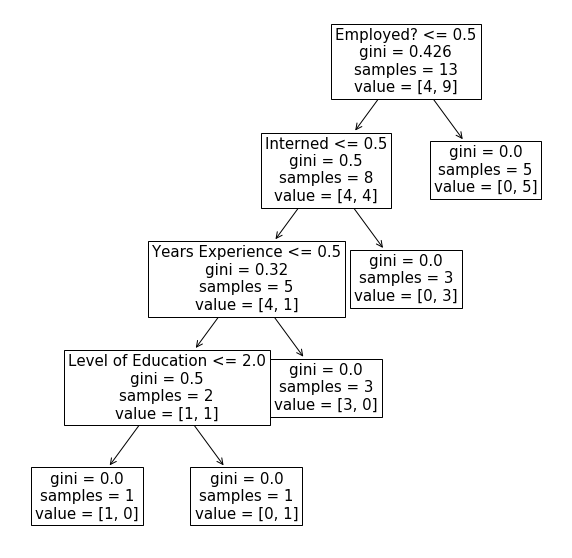

In [20]:
plt.figure(figsize=(10,10))
tree.plot_tree(DT,feature_names=feature,fontsize=15)
plt.show()

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
clf02=RandomForestClassifier(n_estimators=20)

In [55]:
RF=clf02.fit(x,y)

In [56]:
import random

In [57]:
data0.columns.values

array(['Years Experience', 'Employed?', 'Previous employers',
       'Level of Education', 'Top-tier school', 'Interned', 'Hired'],
      dtype=object)

In [61]:
for i in range (100):
    criteria01=random.randint(0,20)
    criteria02=random.randint(0,1)
    criteria03=random.randint(0,5)
    criteria04=random.randint(1,3)
    criteria05=random.randint(0,1)
    criteria06=random.randint(0,1)
    
    print ([[criteria01,criteria02,criteria03,criteria04,criteria05,criteria06]])
    
    print(RF.predict([[criteria01,criteria02,criteria03,criteria04,criteria05,criteria06]]))

[[15, 0, 2, 2, 0, 0]]
[1]
[[12, 0, 5, 2, 0, 1]]
[1]
[[8, 1, 4, 3, 0, 1]]
[1]
[[5, 0, 1, 3, 0, 1]]
[1]
[[18, 0, 3, 3, 0, 1]]
[1]
[[19, 0, 5, 3, 1, 0]]
[0]
[[5, 0, 3, 3, 0, 1]]
[1]
[[19, 0, 4, 3, 0, 0]]
[0]
[[17, 0, 5, 3, 0, 0]]
[0]
[[6, 1, 0, 2, 1, 1]]
[1]
[[11, 1, 4, 2, 0, 0]]
[1]
[[10, 0, 5, 3, 0, 0]]
[0]
[[4, 0, 0, 1, 1, 1]]
[1]
[[4, 1, 5, 3, 1, 1]]
[1]
[[9, 0, 1, 1, 0, 1]]
[1]
[[18, 0, 3, 1, 1, 0]]
[1]
[[12, 0, 3, 2, 0, 1]]
[1]
[[18, 0, 0, 2, 1, 1]]
[1]
[[17, 0, 1, 3, 1, 0]]
[0]
[[0, 1, 5, 2, 0, 0]]
[1]
[[1, 1, 3, 3, 1, 0]]
[1]
[[1, 1, 1, 2, 1, 1]]
[1]
[[9, 1, 3, 2, 0, 1]]
[1]
[[7, 0, 1, 3, 0, 0]]
[0]
[[1, 0, 5, 3, 0, 0]]
[0]
[[4, 0, 2, 3, 1, 1]]
[1]
[[15, 1, 1, 3, 1, 0]]
[1]
[[18, 1, 1, 2, 1, 1]]
[1]
[[5, 0, 0, 2, 1, 0]]
[0]
[[5, 1, 5, 3, 0, 0]]
[1]
[[14, 1, 5, 2, 0, 0]]
[1]
[[15, 1, 4, 3, 1, 0]]
[1]
[[0, 1, 1, 2, 1, 1]]
[1]
[[7, 1, 5, 2, 0, 1]]
[1]
[[19, 0, 4, 1, 1, 0]]
[1]
[[10, 1, 3, 1, 0, 0]]
[1]
[[9, 1, 0, 1, 0, 1]]
[1]
[[8, 0, 5, 1, 0, 1]]
[1]
[[16, 1, 0, 1, 1, 1]]
[1]
[[16, 